# Homework

1. Train NN model with custom linear architecture on MNIST or on any dataset from Kaggle (image data with resolution not higher than 80x80 pixels - 
[Sign language MNIST](https://www.kaggle.com/datasets/datamunge/sign-language-mnist), 
[A-Z Handwritten Alphabet](https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format), etc.)
2. Visualize epoch progress (loss and accuracy curves)
3. Visualize 10 random elements from test set and model results for those elements

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

import torch
import torchvision as tv
import torch.nn as nn
from tqdm import tqdm

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [7]:
trans = tv.transforms.Compose([tv.transforms.ToTensor()])

In [37]:
train_dataset = tv.datasets.MNIST('datasets', 
                                 train=True, 
                                 download=True, 
                                 transform=trans)

test_dataset = tv.datasets.MNIST('datasets', 
                                train=False, 
                                download=True, 
                                transform=trans)

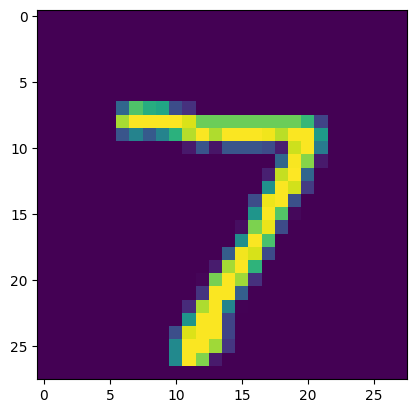

In [40]:
plt.imshow(test_dataset[0][0].numpy()[0])

In [41]:
batch_size = 16
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False)

In [22]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layers = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
        
    def forward(self, x):
        x = self.flatten(x)
        out = self.layers(x)
        return out

In [43]:
model = NeuralNetwork().to(device)

In [ ]:
learning_rate = 1e-3
epochs = 3

# Initialize the loss function; also called `criterion`
loss_fn = nn.CrossEntropyLoss()

# Initialize optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
for img, label in data_loader:
    optimizer.zero_grad()
    label = nn.functional.one_hot(label, num_classes=10).float().to(device)
    # Forward pass
    pred = model(img)
    loss = loss_fn(pred, label)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print(f"Loss: {loss.item()}")  # Print the loss for each batch

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer, epoch):
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    
    tqdm_loader = tqdm(dataloader, unit="batch", desc=f"Epoch {epoch}", total=len(dataloader))
    for batch, (X, y) in enumerate(tqdm_loader):
        optimizer.zero_grad()
        # Compute prediction and loss
        X, y = X.to(device), y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()

        if batch % 1000 == 0:
            tqdm_loader.set_postfix(loss=loss.item())


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [49]:
for t in range(epochs):
    train_loop(train_loader, model, loss_fn, optimizer, epoch=t)
    test_loop(test_loader, model, loss_fn)

torch.save(model, 'model.pth')

Epoch 0: 100%|██████████| 3750/3750 [00:23<00:00, 157.49batch/s, loss=0.39] 


Test Error: 
 Accuracy: 86.7%, Avg loss: 0.596657 



Epoch 1: 100%|██████████| 3750/3750 [00:25<00:00, 146.86batch/s, loss=0.542]


Test Error: 
 Accuracy: 88.3%, Avg loss: 0.483346 



Epoch 2: 100%|██████████| 3750/3750 [00:39<00:00, 94.07batch/s, loss=0.298] 


Test Error: 
 Accuracy: 89.1%, Avg loss: 0.426280 



Epoch 3: 100%|██████████| 3750/3750 [00:28<00:00, 129.31batch/s, loss=0.348]


Test Error: 
 Accuracy: 89.6%, Avg loss: 0.391684 



Epoch 4: 100%|██████████| 3750/3750 [00:25<00:00, 149.90batch/s, loss=0.632]


Test Error: 
 Accuracy: 90.0%, Avg loss: 0.368940 



Epoch 5: 100%|██████████| 3750/3750 [00:24<00:00, 155.62batch/s, loss=0.408]


Test Error: 
 Accuracy: 90.4%, Avg loss: 0.353089 



Epoch 6: 100%|██████████| 3750/3750 [00:26<00:00, 141.84batch/s, loss=0.0733]


Test Error: 
 Accuracy: 90.5%, Avg loss: 0.340715 



Epoch 7: 100%|██████████| 3750/3750 [00:25<00:00, 149.61batch/s, loss=0.23] 


Test Error: 
 Accuracy: 90.8%, Avg loss: 0.330898 



Epoch 8: 100%|██████████| 3750/3750 [00:28<00:00, 129.99batch/s, loss=0.302]


Test Error: 
 Accuracy: 91.1%, Avg loss: 0.321376 



Epoch 9: 100%|██████████| 3750/3750 [00:28<00:00, 129.71batch/s, loss=0.204]


Test Error: 
 Accuracy: 91.3%, Avg loss: 0.315042 



In [58]:
def visualize_test_results(model, dataset, num_samples=10):
    model.eval()
    indices = np.random.choice(len(dataset), num_samples, replace=False)
    
    fig, axes = plt.subplots(2, 5, figsize=(20, 8)) 
    axes = axes.flatten()  
    
    with torch.no_grad():
        for i, idx in enumerate(indices):
            img, label = dataset[idx]
            if len(img.shape) == 3:
                input_tensor = img.unsqueeze(0)
            else:
                input_tensor = img.unsqueeze(0).unsqueeze(0)
            
            input_tensor = input_tensor.to(device)
            
            pred = model(input_tensor).argmax(dim=1).item()
            
            axes[i].imshow(img.cpu().numpy()[0], cmap='gray')
            axes[i].set_title(f"Pred: {pred}, True: {label}")
            axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

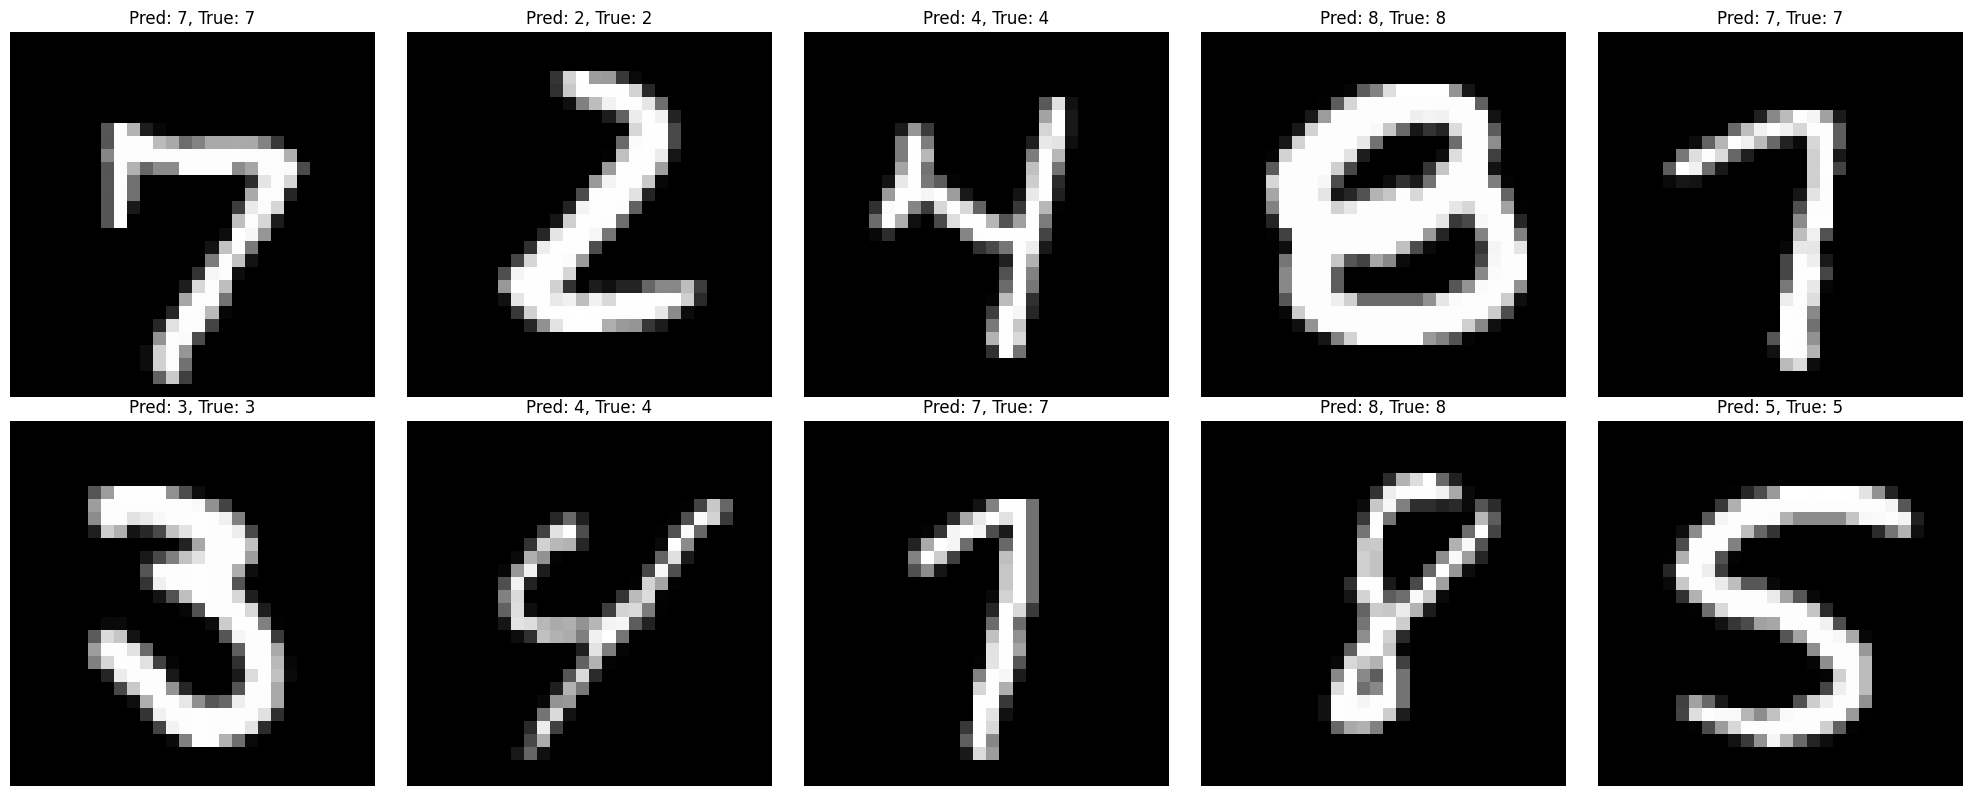

In [59]:
visualize_test_results(model, test_dataset, num_samples=10)